***`Universidad de Sonora, Campus Hermosillo`***

---

***`Profesor: `*** *`Lizarraga Celaya Carlos`*

***`Materia: `*** *`Física Computacional`*

---

***`Trabajo: `*** *`Actividad 4`*

---

***`Alumno: `*** *`Bonillas Miranda Akin`*

***`Número de Expediente: `*** *`219211360`*

***`Correo: `*** *`a219211360@unison.mx // akinbonillasmiranda@gmail.com`*

***`Número Telefónico: `*** *`662 368 2474`*

---

***`Grupo: `*** *`2`*

***`Carrera: `*** *`Licenciatura en Física`*

***`Semestre: `*** *`Cuarto Semestre`*

---

***`Viernes 05 de Febrero de 2021, Hermosillo, Sonora`***


.

***`Actividad 1.`***  *`Crea un nuevo cuaderno de trabajo de Jupyter llamado Actividad4.ipynb en Google Colab.`*

*`Por favor, resume en una sola celda todas las funciones que aplicaste al DataFrame inicial y que concluya con la creación de un nuevo DataFrame para continuar con nuestro trabajo.`* 

*`Se pide sintetizar las características principales del conjunto de datos que estas analizando, aplicando la siguiente secuencia de funciones de un proceso EDA arriba mencionadas. `*

In [ ]:
#==================== Importamos las bibliotecas a utilizar ====================

import pandas as pd             # Importamos Pandas
import numpy as np              # Importamos NumPy
import matplotlib.pyplot as plt # Importamos MatPlotLib
import seaborn as sns           # Importamos SeaBorn


#=================== Introducimos el URL del archivo de texto ==================

URL = 'https://raw.githubusercontent.com/Akin-Bonillas-Miranda/Fisica_Computacional/master/Actividad%201/2027.txt'
  # Tomar la dirección URL del archivo en formato 'raw'


#============================ Definimos las columnas ===========================

cols = [ "Fecha", "Precip", "Evap", "Tmax", "Tmin" ]
  # Definimos los nombres de las columnas


#=========================== Estructuramos el Archivo ==========================

df_data = pd.read_csv( URL, names=cols, encoding="cp1251", sep="\s+", 
                      header=None, skiprows=19, skipfooter=1, engine="python" )
  # encoding='cp1251': El archivo tiene códigos ASCII extendido (Español)
  #         sep='\s+': El separador de datos es de uno o más espacios
  #       header=None: afirmamos que no nay encabezado
  #       skiprows=19: Se brincará los primeros 19 renglones 
  #      skipfooter=1: y el último
  #   engine='python': Se procesan los datos utilizando Python


#======= Hacemos una copia de trabajo y preservamos el DataFrame original ======

df_tran0 = df_data.copy()


#============= Reemplazamos los textos 'Nulo' por espacio en blanco ============

str_nulo = "Nulo"
df_tran1 = df_tran0.replace( to_replace=str_nulo, value=" ", regex=True )


#==== Convertimos los valores de las variables ambientales a núm. flotantes ====

cols_list = [ "Precip", "Evap", "Tmax", "Tmin" ]
for cols in cols_list:
  df_tran1[ cols ] = pd.to_numeric( df_tran1[cols], errors="coerce" )


#====== Hacemos una copia de trabajo y preservamos el DataFrame Modificado =====

df_tran2 = df_tran1.copy()


#================ Conviertimos una cadena en tipo datetime64[ns] ===============

df_tran2[ "Fecha" ] = pd.to_datetime( df_tran2[ "Fecha" ], 
                                     dayfirst=True ).copy()


#=========== Buscamos ahora añadir dos columnas adicionales: Año, Mes ==========

df_tran2[ "Año" ] = df_tran2[ "Fecha" ].dt.year
df_tran2[ "Mes" ] = df_tran2[ "Fecha" ].dt.month


#== Definimos un nuevo DataFrame para el análisis de los datos meteorológicos == 

df_clim = df_tran2.copy()
df_clim.info()

print( df_clim.head() )
print( " " )
print( df_clim.tail() ) 
print( " " )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12024 entries, 0 to 12023
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   12024 non-null  datetime64[ns]
 1   Precip  11098 non-null  float64       
 2   Evap    121 non-null    float64       
 3   Tmax    12016 non-null  float64       
 4   Tmin    12014 non-null  float64       
 5   Año     12024 non-null  int64         
 6   Mes     12024 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 657.7 KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1957-12-13     0.0   NaN  24.4   NaN  1957   12
1 1957-12-14     0.0   NaN  24.4  15.6  1957   12
2 1957-12-15     0.0   NaN  25.6  18.3  1957   12
3 1957-12-16     0.0   NaN  22.2  17.8  1957   12
4 1957-12-17     0.0   NaN  22.2  16.7  1957   12
 
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
12019 2000-02-25     0.0   NaN  26.0  14.0  2000    2
12020 2000-02-2

.

***`Actividad 2.`*** *`Crear Histogramas de las variables de Precipitación, Evaporación, Temperaturas Máxima y Mínima de el conjunto de datos que se están analizando (Función: sns.histplot()). Complementar en su caso con las gráficas de la función de densidad de probabilidad correspondiente (Función: sns.kdeplot())`*

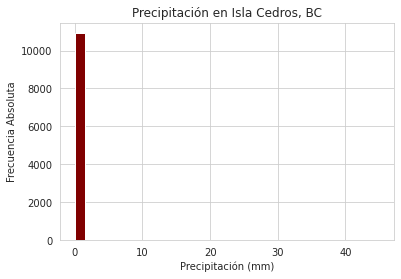

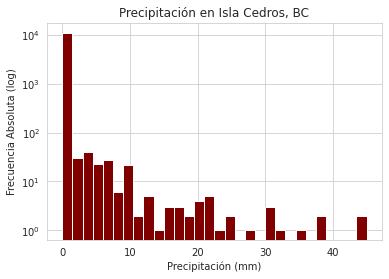

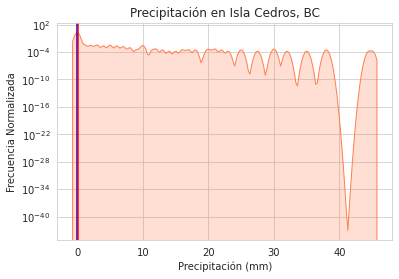

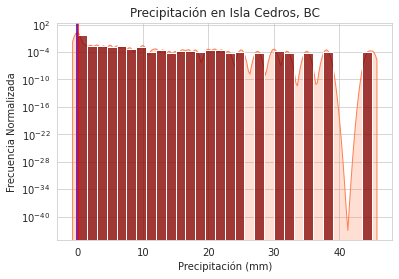

In [ ]:
#========================= Histogramas de Precipitación ========================

plt.hist( df_clim.Precip, bins=30, color="maroon" )

plt.xlabel( "Precipitación (mm)" )              # Etiqueta en el eje x
plt.ylabel( "Frecuencia Absoluta" )             # Etiqueta en el eje y
plt.title( "Precipitación en Isla Cedros, BC" ) # Título

plt.grid( True ) # Añadir rejilla
plt.show()


#========================= Histogramas de Precipitación ========================
#                              (Escala Logaritmica)        

plt.hist( df_clim.Precip, bins=30, color="maroon" )

plt.yscale( "log" ) # Escala Logarítmica

plt.xlabel( "Precipitación (mm)" )              # Etiqueta en el eje x
plt.ylabel( "Frecuencia Absoluta (log)" )       # Etiquita en el eje y
plt.title( "Precipitación en Isla Cedros, BC" ) # Título

plt.grid( True ) # Añadir rejilla
plt.show()


#============== Graficamos la función de densidad de Probabilidad ==============
#                         KDE (Kernel Density Estimate)

Premed = df_clim.Precip.median() # Mediana de la Precipitación
Preprom = df_clim.Precip.mean()  # Promedio de la Precipitación

sns.set_style( "whitegrid" )

sns.kdeplot( df_clim.Precip, fill=True, color="coral" );

plt.axvline( Premed, color="b" );  # Graficamos la mediana
plt.axvline( Preprom, color="r" ); # Graficamos el promedio

plt.yscale( "log" ) # Escala Logarítmica

plt.xlabel( "Precipitación (mm)" )              # Etiqueta del eje x
plt.ylabel( "Frecuencia Normalizada" )          # Etiqueta del eje y
plt.title( "Precipitación en Isla Cedros, BC" ) # Título

plt.show()


#============== Histograma y Función de Probabilidad Sobrepuestas ==============

sns.set_style( "whitegrid" )

sns.histplot( data=df_clim, x="Precip", bins=30, stat="density", 
             color="maroon" );
sns.kdeplot( df_clim.Precip, fill=True, color="coral" );

plt.axvline( Premed, color="b" );  # Graficamos la mediana
plt.axvline( Preprom, color="r" ); # Graficamos el promedio

plt.yscale( "log" ) # Escala Logarítmica

plt.xlabel( "Precipitación (mm)" )              # Etiqueta del eje x
plt.ylabel( "Frecuencia Normalizada" )          # Etiqueta del eje y
plt.title( "Precipitación en Isla Cedros, BC" ) # Título

plt.show()

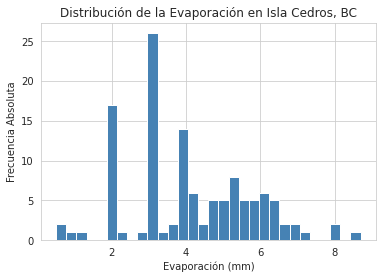

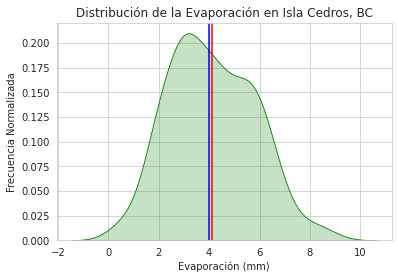

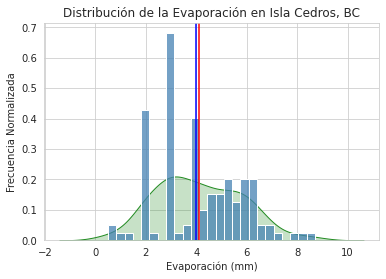

In [ ]:
#========================== Histogramas de Evaporación =========================

plt.hist( df_clim.Evap, bins=30, color="steelblue" )

plt.xlabel( "Evaporación (mm)" )    # Etiqueta en el eje x
plt.ylabel( "Frecuencia Absoluta" ) # Etiqueta en el eje y
plt.title( "Distribución de la Evaporación en Isla Cedros, BC" ) # Título

plt.grid( True ) # Añadir rejilla
plt.show()

#============== Graficamos la función de densidad de Probabilidad ==============
#                         KDE (Kernel Density Estimate)

Evamed = df_clim.Evap.median()  # Mediana de la Evaporación
Evaprom = df_clim.Evap.mean()   # Promedio de la Evaporación

sns.set_style( "whitegrid" )

sns.kdeplot( df_clim.Evap, fill=True, color="forestgreen" ); 

plt.axvline( Evamed, color="b" );  # Graficamos la mediana
plt.axvline( Evaprom, color="r" ); # Graficamos el promedio

plt.xlabel( "Evaporación (mm)" )       # Etiqueta del eje x
plt.ylabel( "Frecuencia Normalizada" ) # Etiqueta del eje y

plt.title( "Distribución de la Evaporación en Isla Cedros, BC" ) # Título

plt.show()

#============== Histograma y Función de Probabilidad Sobrepuestas ==============

sns.set_style( "whitegrid" )

sns.histplot( data=df_clim, x="Evap", bins=25, stat="density", 
             color="steelblue" );
sns.kdeplot( df_clim.Evap, fill=True, color="forestgreen" ); 

plt.axvline( Evamed, color="b" );  # Graficamos la mediana
plt.axvline( Evaprom, color="r" ); # Graficamos el promedio

plt.xlabel( "Evaporación (mm)" )       # Etiqueta del eje x
plt.ylabel( "Frecuencia Normalizada" ) # Etiqueta del eje y

plt.title( "Distribución de la Evaporación en Isla Cedros, BC" ) # Título

plt.show()

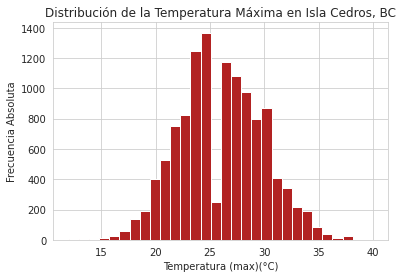

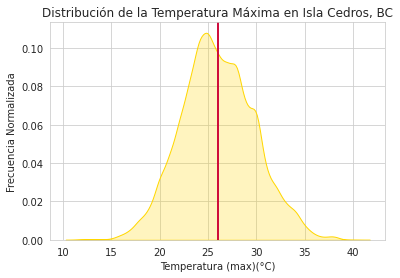

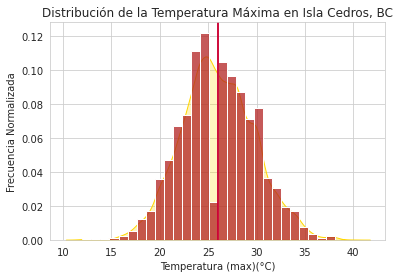

In [ ]:
#====================== Histogramas de Temperaturas Máximas ====================

plt.hist( df_clim.Tmax, bins=30, color="firebrick" )

plt.xlabel( "Temperatura (max)(°C)" )                # Etiqueta en el eje x
plt.ylabel( "Frecuencia Absoluta" )                  # Etiqueta en el eje y
plt.title( "Temperatura Máxima en Isla Cedros, BC" ) # Título

plt.grid( True ) # Anadir rejilla
plt.show()

#============== Graficamos la función de densidad de Probabilidad ==============
#                         KDE (Kernel Density Estimate)

Tmaxmed = df_clim.Tmax.median()  # Mediana de la Temperatura Máxima
Tmaxprom = df_clim.Tmax.mean()   # Promedio de la Temperatura Máxima

sns.set_style( "whitegrid" )

sns.kdeplot( df_clim.Tmax, fill=True, color="gold" ); 

plt.axvline( Tmaxmed, color = "b" );  # Graficamos la mediana
plt.axvline( Tmaxprom, color = "r" ); # Graficamos el promedio

plt.xlabel( "Temperatura (max)(°C)" )                # Etiqueta del eje x
plt.ylabel( "Frecuencia Normalizada" )               # Etiqueta del eje y
plt.title( "Temperatura Máxima en Isla Cedros, BC" ) # Título

plt.show()

#============== Histograma y Función de Probabilidad Sobrepuestas ==============

sns.set_style("whitegrid")

sns.histplot(data=df_clim, x='Tmax', bins=30, stat='density', 
             color="firebrick" );
sns.kdeplot( df_clim.Tmax, fill=True, color="gold" ); 

plt.axvline( Tmaxmed, color = "b" );  # Graficamos la mediana
plt.axvline( Tmaxprom, color = "r" ); # Graficamos el promedio

plt.xlabel( "Temperatura (max)(°C)" )  # Etiqueta del eje x
plt.ylabel( "Frecuencia Normalizada" ) # Etiqueta del eje y

plt.title( "Distribución de la Temperatura Máxima en Isla Cedros, BC" ) # Título

plt.show()

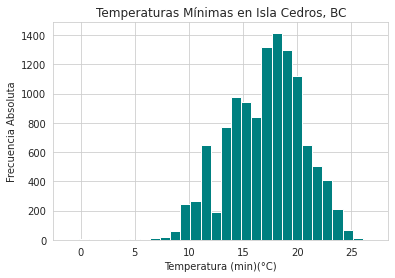

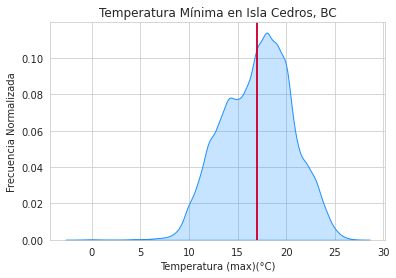

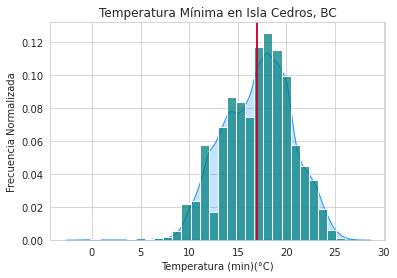

In [ ]:
#====================== Histogramas de Temperaturas Mínimas ====================

plt.hist( df_clim.Tmin, bins=30, color="teal" )

plt.xlabel( "Temperatura (min)(°C)" )                  # Etiqueta en el eje x
plt.ylabel( "Frecuencia Absoluta" )                    # Etiqueta en el eje y
plt.title( "Temperaturas Mínimas en Isla Cedros, BC" ) # Título

plt.grid( True ) 
plt.show()

#============== Graficamos la función de densidad de Probabilidad ==============
#                         KDE (Kernel Density Estimate)

Tminmed = df_clim.Tmin.median() # Mediana de la Temperatura Mínima
Tminprom = df_clim.Tmin.mean()  # Promedio de la Temperatura Mínima

sns.set_style( "whitegrid" )

sns.kdeplot( df_clim.Tmin, fill=True, color="dodgerblue" ); 

plt.axvline( Tminmed, color="b" );  # Graficamos la mediana
plt.axvline( Tminprom, color="r" ); # Graficamos el promedio

plt.xlabel( "Temperatura (max)(°C)" )                # Etiqueta del eje x
plt.ylabel( "Frecuencia Normalizada" )               # Etiqueta del eje y
plt.title( "Temperatura Mínima en Isla Cedros, BC" ) # Título

plt.show()

#============== Histograma y Función de Probabilidad Sobrepuestas ==============

sns.set_style("whitegrid")

sns.histplot( data=df_clim, x="Tmin", bins=30, stat="density",
             color="teal" );
sns.kdeplot( df_clim.Tmin, fill=True, color="dodgerblue" );

plt.axvline( Tminmed, color="b" );  # Graficamos la mediana
plt.axvline( Tminprom, color="r" ); # Graficamos el promedio

plt.xlabel( "Temperatura (min)(°C)" )                # Etiqueta del eje x
plt.ylabel( "Frecuencia Normalizada" )               # Etiqueta del eje y
plt.title( "Temperatura Mínima en Isla Cedros, BC" ) # Título

plt.show()

.

***`Actividad 3.`*** *`Crear las gráficas de cajas (Boxplot) para la Evaporación, Temperaturas Máxima y Mínima (Función: sns.boxplot())`*

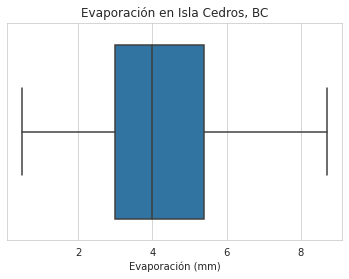

In [ ]:
#======================== Gráfica de Caja de Evaporación =======================

sns.set_style( "whitegrid" )

sns.boxplot( x=df_clim.Evap, data=df_clim, orient="h" ).set( xlabel="Evaporación (mm)", 
                                                          title="Evaporación en Isla Cedros, BC" );

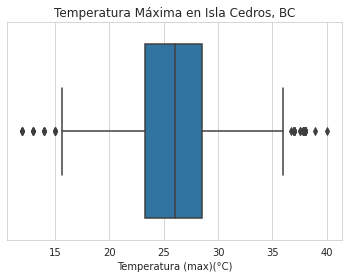

In [ ]:
#==================== Gráfica de Caja de Temparaturas Máximas ================

sns.set_style( "whitegrid" )

sns.boxplot( x=df_clim.Tmax, data=df_clim, orient="h" ).set( xlabel="Temperatura (max)(°C)", 
                                                          title="Temperatura Máxima en Isla Cedros, BC" );

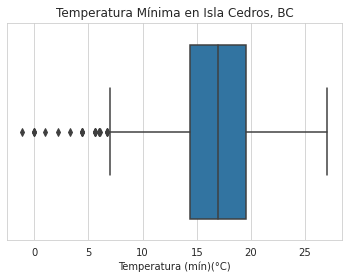

In [ ]:
#==================== Gráfica de Caja de Temparaturas Mínimas ================

sns.set_style( "whitegrid" )

sns.boxplot( x=df_clim.Tmin, data=df_clim, orient="h" ).set( xlabel="Temperatura (mín)(°C)", 
                                                          title="Temperatura Mínima en Isla Cedros, BC" );

.

***`Actividad 4.`*** *`Produzca las gráficas de barras para la Precipitación agrupado por Años y después por meses (Función: sns.barplot())`*

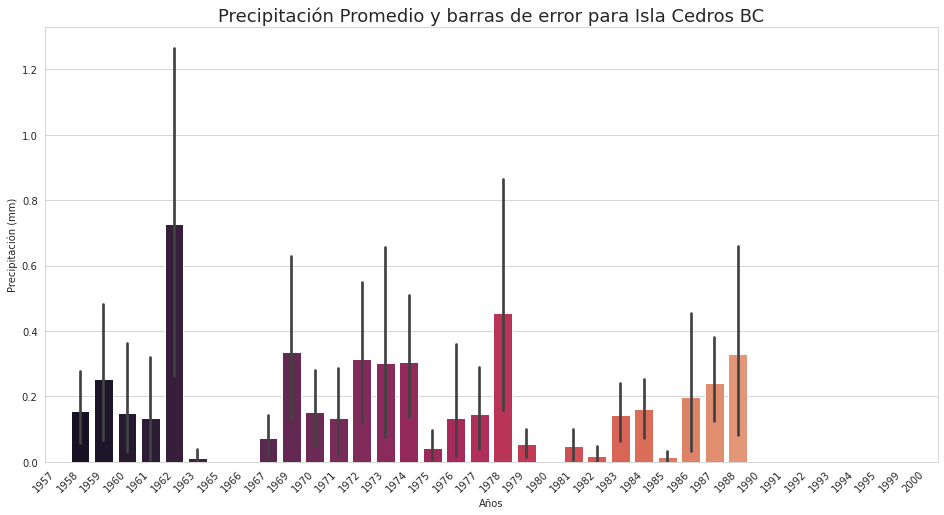

In [ ]:
#============================ Precipitación por Año ============================

sns.set_style( "whitegrid" )
plt.figure( figsize=(16,8) )

g=sns.barplot( x="Año", y="Precip", data=df_clim, palette="rocket" );

# Rotamos 45º los Años en el eje x para mejor lectura
g.set_xticklabels( g.get_xticklabels(), rotation=45, 
                  horizontalalignment="right" );

plt.xlabel( "Años" )
plt.ylabel( "Precipitación (mm)" )
plt.title( "Precipitación Promedio y barras de error para Isla Cedros BC", 
          fontsize=18 )

plt.show()

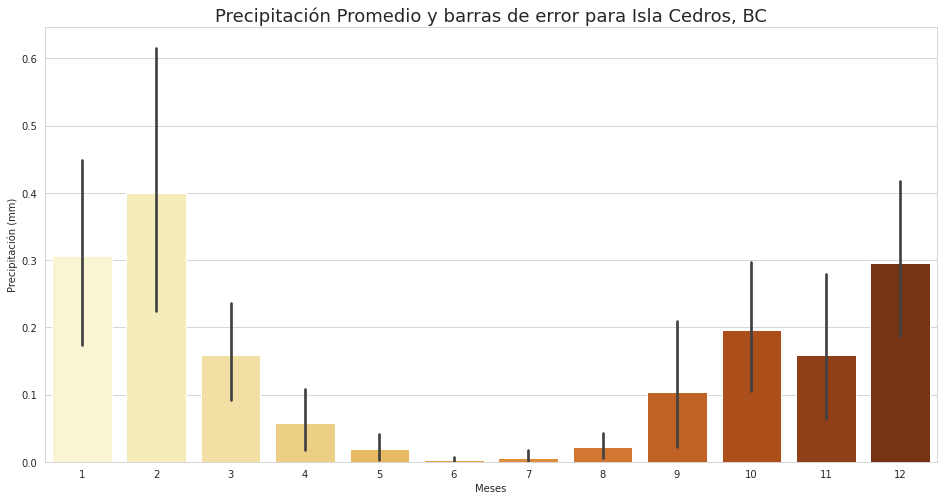

In [ ]:
#============================ Precipitación por mes ============================

sns.set_style( "whitegrid" )
plt.figure( figsize=(16,8) )

g=sns.barplot( x="Mes", y="Precip", data=df_clim, palette="YlOrBr" );

plt.xlabel( "Meses" )
plt.ylabel( "Precipitación (mm)" )
plt.title( "Precipitación Promedio y barras de error para Isla Cedros, BC", 
          fontsize=18 )

plt.show()

.

***`Actividad 5.`*** *`Por favor cree una colección de los últimos 30 años de datos, utilizando condiciones de filtrado por un rango de años. Crear las gráficas de línea de la Precipitación, Temperaturas Máxima y Mínima como funciones del tiempo (Últimos 30 Años). (Función: sns.lineplot())`*

In [ ]:
#======================== Conjuntos de años de 30 años  ========================

df_70 = df_clim[ (df_clim["Año"] >= 1957) & (df_clim["Año"] < 1970) ] # 13 años
df_00 = df_clim[ (df_clim["Año"] >= 1970) & (df_clim["Año"] < 2000) ]


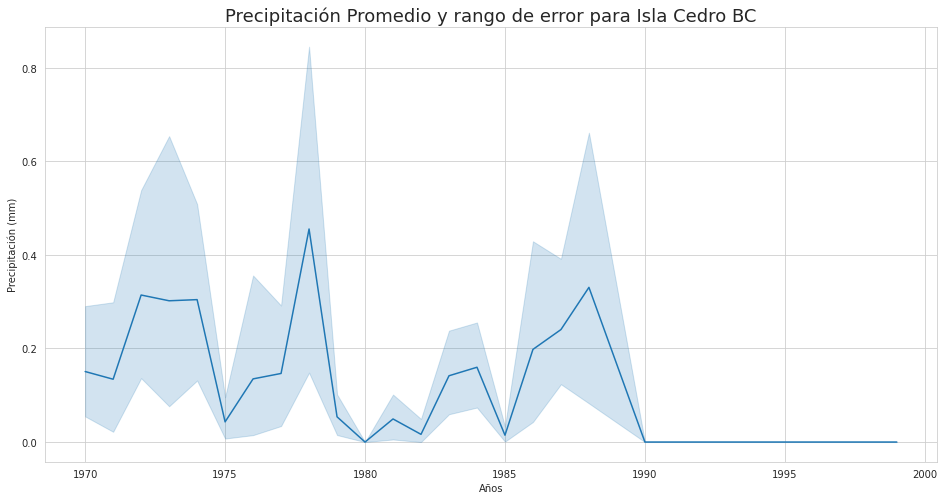

In [ ]:
#======================= Precipitación - últimos 30 años =======================

sns.set_style( "whitegrid" )
plt.figure( figsize=(16,8) )

g=sns.lineplot( x="Año", y="Precip", data=df_00 );

plt.xlabel( "Años" )
plt.ylabel( "Precipitación (mm)" )
plt.title( "Precipitación Promedio y rango de error para Isla Cedro BC", 
          fontsize=18)

plt.show()

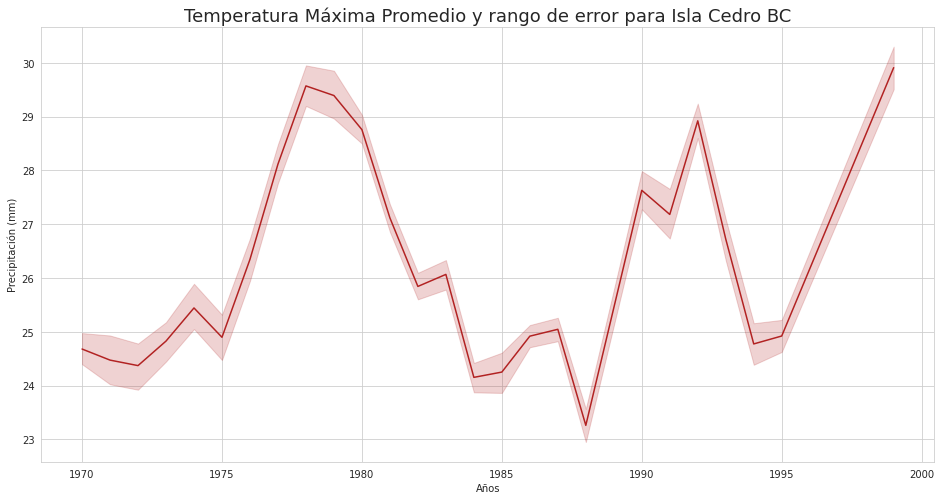

In [ ]:
#===================== Temperatura Máxima - últimos 30 años ====================

sns.set_style( "whitegrid" )
plt.figure( figsize=(16,8) )

g=sns.lineplot( x="Año", y="Tmax", data=df_00, color="firebrick" );

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel( "Años" )
plt.ylabel( "Precipitación (mm)" )
plt.title( "Temperatura Máxima Promedio y rango de error para Isla Cedro BC", 
          fontsize=18)

plt.show()

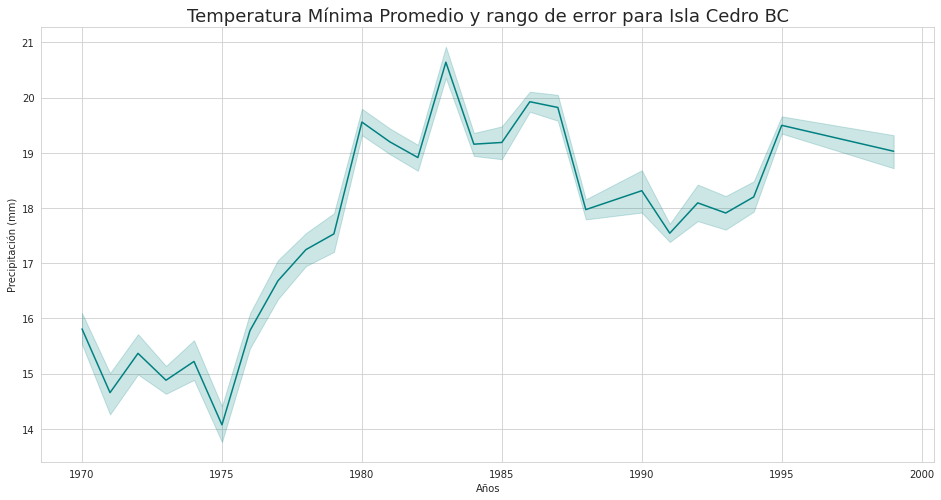

In [ ]:
#===================== Temperatura Mínima - últimos 30 años ====================

sns.set_style( "whitegrid" )
plt.figure( figsize=(16,8) )

g=sns.lineplot( x="Año", y="Tmin", data=df_00, color="teal" );

plt.xlabel( "Años" )
plt.ylabel( "Precipitación (mm)" )
plt.title( "Temperatura Mínima Promedio y rango de error para Isla Cedro BC", 
          fontsize=18)

plt.show()

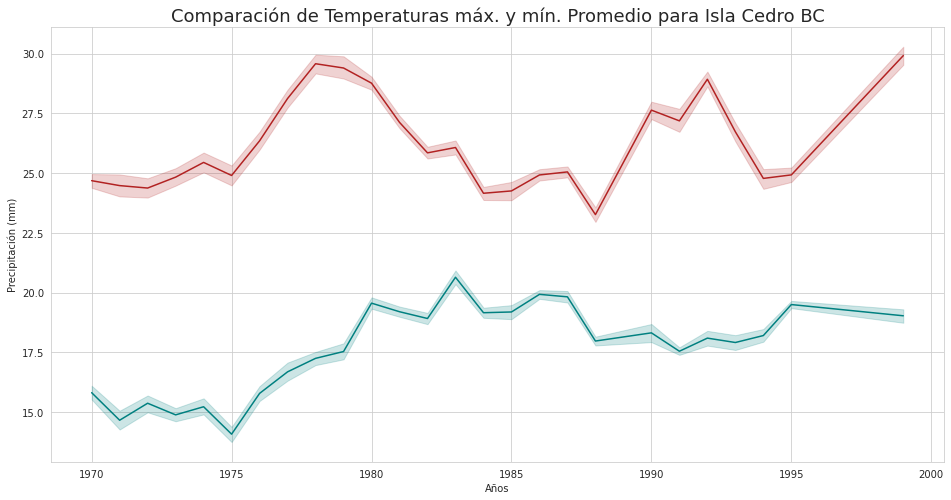

In [ ]:
#================ Comparación de Temperaturas - últimos 30 años ================

sns.set_style( "whitegrid" )
plt.figure( figsize=(16,8) )

g=sns.lineplot( x="Año", y="Tmax", data=df_00, color="firebrick" );
g=sns.lineplot( x="Año", y="Tmin", data=df_00, color="teal" );

plt.xlabel( "Años" )
plt.ylabel( "Precipitación (mm)" )
plt.title( "Comparación de Temperaturas máx. y mín. Promedio para Isla Cedro BC", 
          fontsize=18)

plt.show()

.

***`Actividad 6.`***  *`Con el conjunto de 30 años de datos, produzca diagramas de cajas (Función: sns.boxplot()) para observar la variabilidad de las Temperaturas (Max y Tmin) y la Evaporación agrupados por Mes.`*

In [ ]:
Tmaxmed = df_meteo.Tmax.mean() # Promedio de la Temperatura Máxima
Tminmed = df_meteo.Tmin.mean() # Promedio de la Temperatura Mínima

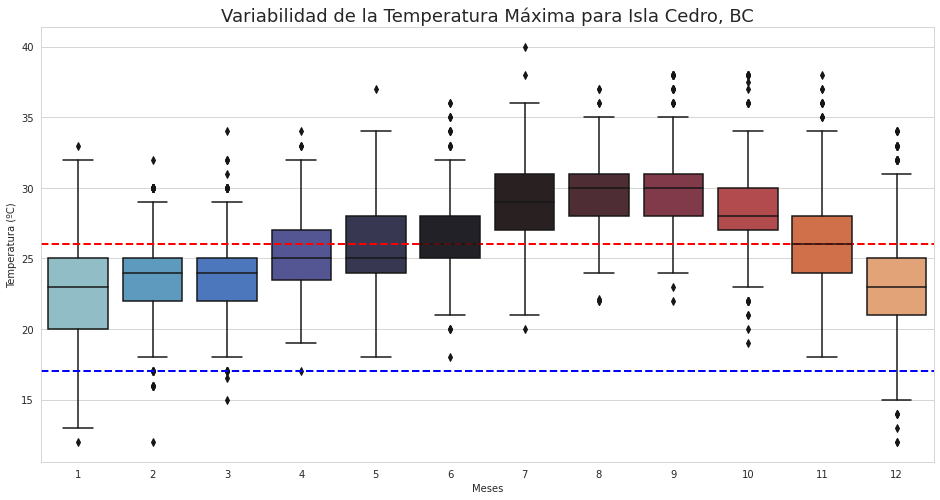

mean(Tmax) =  26.0
mean(Tmin) =  17.0
ΔTmed =  9.0


In [ ]:
#==================== Temepraturas Máximas - últimos 30 años ===================
#                                Agrupado por Mes

sns.set_style( "whitegrid" )
plt.figure( figsize=(16,8) )

g=sns.boxplot( x="Mes", y="Tmax", data=df_00, palette="icefire" );

plt.axhline( Tmaxmed, color="r", linestyle="--", linewidth=2 ); # Promedio de
                                                                # Tmax
plt.axhline( Tminmed, color="b", linestyle="--", linewidth=2 ); # Promedio de
                                                                # Tmin 

plt.xlabel( "Meses" )
plt.ylabel( "Temperatura (ºC)" )
plt.title( "Variabilidad de la Temperatura Máxima para Isla Cedro, BC", 
          fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print( "mean(Tmax) = ", Tmaxmed )
print( "mean(Tmin) = ", Tminmed )
print( "ΔTmed = ", (Tmaxmed-Tminmed) )


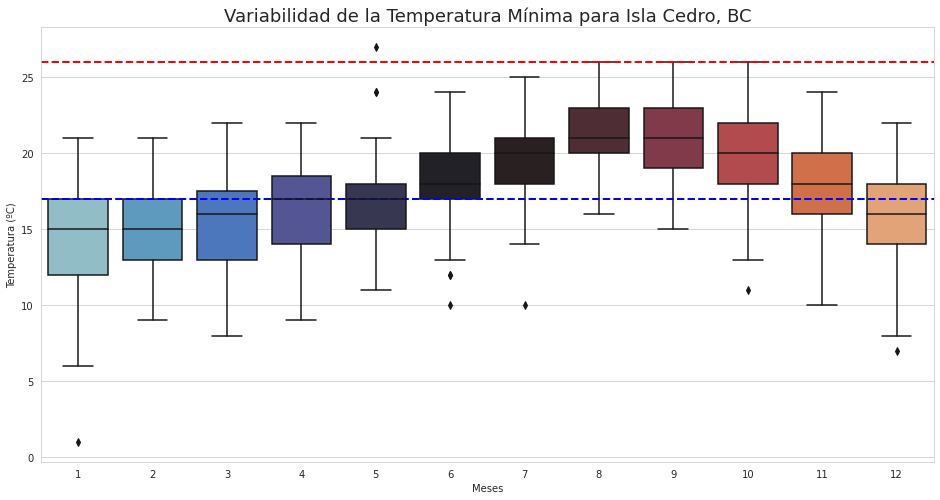

mean(Tmax) =  26.0
mean(Tmin) =  17.0
ΔTmed =  9.0


In [ ]:
#==================== Temepraturas Mínimas - últimos 30 años ===================
#                                Agrupado por Mes

sns.set_style( "whitegrid" )
plt.figure( figsize=(16,8) )

g=sns.boxplot( x="Mes", y="Tmin", data=df_00, palette="icefire" );

plt.axhline( Tmaxmed, color="r", linestyle="--", linewidth=2 ); # Promedio de
                                                                # Tmax
plt.axhline( Tminmed, color="b", linestyle="--", linewidth=2 ); # Promedio de
                                                                # Tmin 

plt.xlabel( "Meses" )
plt.ylabel( "Temperatura (ºC)" )
plt.title( "Variabilidad de la Temperatura Mínima para Isla Cedro, BC", 
          fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print( "mean(Tmax) = ", Tmaxmed )
print( "mean(Tmin) = ", Tminmed )
print( "ΔTmed = ", (Tmaxmed-Tminmed) )